**Week:** 10

**Assignment from Group:** Uptight Wealth

**Link:** https://github.com/Micniks/Python-Week10-Group-3-Assignments

# The Python Cult

## Assignment 1: Organize your cult

1. Read in the random names in the file ***Random_Names.txt*** into a list ***cultist_names***.
2. Make a support method ***recruit_cultist***, that takes a string **name**, and returns a dict with *skills* as below, each assigned a random int between 0 and 5:
```python
min_score = 0
max_score = 5
cultist = {
  'name': {
    'stealth': random.randint(min_score, max_score), 
    'influence': random.randint(min_score, max_score), 
    'endurance': random.randint(min_score, max_score), 
    'lore': random.randint(min_score, max_score), 
    'economic': random.randint(min_score, max_score), 
    'strength': random.randint(min_score, max_score), 
    'insanity': random.randint(min_score, max_score)
  }
}
```
3. Run all names from ***cultist_names*** thought the ***recruit_cultist*** method, and gather all the results in a ***cult*** dict
4. Make the following dict ***cult_roles*** as below. Each value represents how importent a skill is for the given role:
```python
cult_roles = {
'Priest': {'stealth': -1, 'influence': 3, 'endurance': 2, 'lore': 4, 'economic': 1, 'strength': 0, 'insanity': 5},
'Enforcer': {'stealth': 1, 'influence': 3, 'endurance': 4, 'lore': 0, 'economic': -1, 'strength': 5, 'insanity': 2},
'Assassin': {'stealth': 5, 'influence': -1, 'endurance': 4, 'lore': 1, 'economic': 0, 'strength': 2, 'insanity': 3},
'Recruiter': {'stealth': 1, 'influence': 5, 'endurance': 0, 'lore': 3, 'economic': 2, 'strength': -1, 'insanity': 4},
'Accountant': {'stealth': 2, 'influence': 1, 'endurance': 3, 'lore': 4, 'economic': 5, 'strength': 0, 'insanity': -1},
'Advisor': {'stealth': 2, 'influence': 4, 'endurance': -1, 'lore': 5, 'economic': 3, 'strength': 0, 'insanity': 1}
}
```
5. Make a method ***assign_cult_roles***, that takes the ***cult*** and ***cult_roles*** dicts, and returned the ***cult*** dict, where each name dict has gotten an attribute role. Each role should be assign on which of the roles have the highest 'score' when dotted between the name dict and the cult_roles.

In [1]:
#1.1
import requests
import random
import numpy as np
import sys

url_names = 'https://raw.githubusercontent.com/Micniks/Python-Week10-Group-3-Assignments/main/Random_Names.txt'

max_cultist_amount = 100
min_score = 0
max_score = 5

response = requests.get(url_names)
full_read = ''
for line in response:
    decoded_line = line.decode("utf-8")
    full_read = full_read + decoded_line

all_cultist_names = full_read.split('\n');
cultist_names = []
if(len(all_cultist_names) <= max_cultist_amount): 
    cultist_names = all_cultist_names
else:
    cultist_names = all_cultist_names[:max_cultist_amount]

    
#1.2
def recruit_cultist(name):
    cultist = {name: {
    'stealth': random.randint(min_score, max_score), 
    'influence': random.randint(min_score, max_score), 
    'endurance': random.randint(min_score, max_score), 
    'lore': random.randint(min_score, max_score), 
    'economic': random.randint(min_score, max_score), 
    'strength': random.randint(min_score, max_score), 
    'insanity': random.randint(min_score, max_score)}}
    return cultist
    
    
#1.3
def make_cult(cultist_names_list):
    cult = {}
    for cultist in cultist_names_list:
        cult.update(recruit_cultist(cultist))
    return cult

cult = make_cult(cultist_names)


#1.4
cult_roles = {
'Priest': {'stealth': -1, 'influence': 3, 'endurance': 2, 'lore': 4, 'economic': 1, 'strength': 0, 'insanity': 5},
'Enforcer': {'stealth': 1, 'influence': 3, 'endurance': 4, 'lore': 0, 'economic': -1, 'strength': 5, 'insanity': 2},
'Assassin': {'stealth': 5, 'influence': -1, 'endurance': 4, 'lore': 1, 'economic': 0, 'strength': 2, 'insanity': 3},
'Recruiter': {'stealth': 1, 'influence': 5, 'endurance': 0, 'lore': 3, 'economic': 2, 'strength': -1, 'insanity': 4},
'Accountant': {'stealth': 2, 'influence': 1, 'endurance': 3, 'lore': 4, 'economic': 5, 'strength': 0, 'insanity': -1},
'Advisor': {'stealth': 2, 'influence': 4, 'endurance': -1, 'lore': 5, 'economic': 3, 'strength': 0, 'insanity': 1}
}


#Support Method for 1.5
def make_cultist_matrix(data):
    stats = ['stealth', 'influence', 'endurance', 'lore', 'economic', 'strength', 'insanity']
    matrix = []
    names = []
    for name, stats_values in data.items():
        matrix.append(list(stats_values[key] for key in stats))
        names.append(name)
    return {'names': names,'matrix': np.array(matrix)}


#1.5
def assign_cult_roles(cult, cult_roles):
    matrix_cultists_info = make_cultist_matrix(cult)
    cultists_names = matrix_cultists_info['names']
    matrix_C = matrix_cultists_info['matrix']
    matrix_roles_info = make_cultist_matrix(cult_roles)
    roles_names = matrix_roles_info['names']
    matrix_R = matrix_roles_info['matrix'].T
    result_values = matrix_C.dot(matrix_R)
    
    #print('Cultist Values:\n', matrix_C, end='\n\n')
    #print('Roles Modificers:\n', matrix_R, end='\n\n')
    #print('Cultist Role Results:\n', result_values, end='\n\n')
    
    result = {}
    for y_idx in range(0, len(result_values)-1):
        name = cultists_names[y_idx]
        row = result_values[y_idx]
        highest= {'idx': 0, 'value': -sys.maxsize - 1, 'role': ''}
        for x_idx in range(0,len(row)):
            if(highest['value'] < row[x_idx]):
                highest['idx'] = x_idx
                highest['value'] = row[x_idx]
                highest['role'] = roles_names[x_idx]
        result.update({name: highest['role']})
    return result

def print_role_amount(cultists_roles):
    amounts_for_roles = {}
    for role in cult_roles:
        amounts_for_roles.update({role: 0})
    for cultist in cultists_roles:
        role = cultists_roles[cultist]
        amounts_for_roles[role] += 1
    for role in amounts_for_roles:
        print(role + ':', amounts_for_roles[role])

culists_roles = assign_cult_roles(cult, cult_roles)
print(culists_roles)
print_role_amount(culists_roles)

{'Johnathon Compton': 'Recruiter', 'Wilma Hudson': 'Accountant', 'Mary Harrington': 'Assassin', 'Thelma Blanchard': 'Priest', 'Lindsey Mcgee': 'Advisor', 'Harlan Ewing': 'Advisor', 'Cara Giles': 'Accountant', 'Roger Oliver': 'Priest', 'Herminia Munoz': 'Accountant', 'Fred Alvarez': 'Accountant', 'Bud Woods': 'Priest', 'Freida Case': 'Accountant', 'Eldridge Hatfield': 'Recruiter', 'Jan Cabrera': 'Assassin', 'Jermaine Pratt': 'Accountant', 'Lanny Huynh': 'Enforcer', 'Ulysses Mccall': 'Priest', 'Coleen Weber': 'Priest', 'Trudy Gaines': 'Priest', 'Loyd Tapia': 'Advisor', 'George Gordon': 'Accountant', 'Nick Oconnor': 'Priest', 'Latoya Gilmore': 'Accountant', 'Eldon Pena': 'Recruiter', 'Tania Roberson': 'Assassin', 'Allie Sanchez': 'Accountant', 'Weston Chang': 'Recruiter', 'Marci Salinas': 'Enforcer', 'Tasha Allison': 'Priest', 'Jerri Carey': 'Assassin', 'Virginia Harrison': 'Assassin', 'April Hull': 'Priest', 'Lupe Eaton': 'Enforcer', 'Inez Lozano': 'Accountant', 'Forrest Santana': 'Pries

## Assignment 2: Cult Recruitment Statistics

1. Save the data from the ***cult_statistics.csv*** file in a variable ***cult_data*** *(You can use panda here)*
2. Plot new recruits as a function to amount_spend.
3. Plot new recruits as a function to total_amount.
4. Make a model object from *klearn linear regression model* to use for the following assignments.
5. Predict new recuits if amount_spend doubles
6. Predict new recuits if total_amount decrease by 20%
7. Reverse the data, to predict how much amount_spend should be, to make new_recruits equal to 1000

     year  new_recruit  amount_spend(per_10000)  total_amount
0    1605            9                     0.09           344
1    1606           11                     0.11           355
2    1607           11                     0.11           366
3    1608           10                     0.10           376
4    1609           12                     0.11           388
..    ...          ...                      ...           ...
411  2016          704                     7.05         64063
412  2017          601                     6.14         64664
413  2018          677                     7.06         65341
414  2019          659                     6.73         66000
415  2020          666                     6.66         66666

[416 rows x 4 columns]
If the amount spend from 2020 was double, the amount of new recruits should be: 1330
If the total amount from 2020 was decreased by 20%, the amount of new recruits should be: 537
If the new recruit amount should increase by a total 

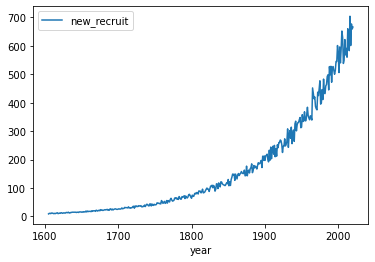

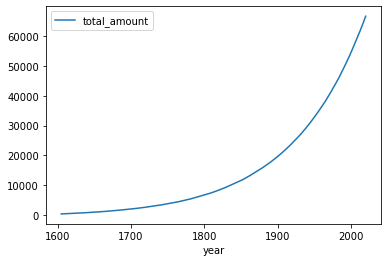

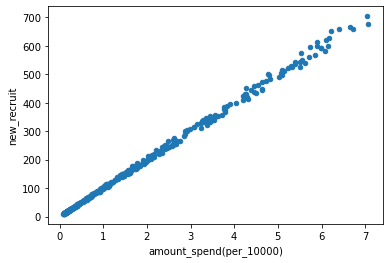

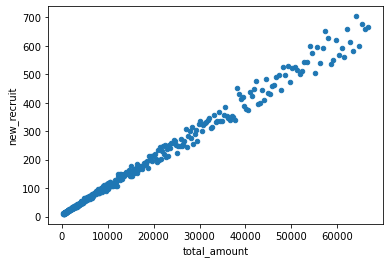

In [4]:
import pandas as pd
import sklearn.linear_model
%matplotlib inline

#2.1
url_csv = 'https://raw.githubusercontent.com/Micniks/Python-Week10-Group-3-Assignments/main/cult_statistics.csv'
data = pd.read_csv(url_csv)
print(data)

new_recruits = data['new_recruit']
data.plot(x = 0, y = 1)
data.plot(x = 0, y = 3)


#2.2
data.plot.scatter(x = 2, y = 1)


#2.3
data.plot.scatter(x = 3, y = 1)


#2.4
model = sklearn.linear_model.LinearRegression()


#2.5
x_data = list([x] for x in data['amount_spend(per_10000)'])
y_data = data['new_recruit']
value_of_latest_year = data['amount_spend(per_10000)'][len(data)-1]

model.fit(x_data, y_data)
modifier = 2
new_value = model.predict([[value_of_latest_year*modifier]])[0]
print('If the amount spend from 2020 was double, the amount of new recruits should be:', int(round(new_value,0)))


#2.6
x_data = list([x] for x in data['total_amount'])
y_data = data['new_recruit']
value_of_latest_year = data['total_amount'][len(data)-1]

model.fit(x_data, y_data)
modifier = 0.8
new_value = int(round(model.predict([[value_of_latest_year*modifier]])[0],0))
print('If the total amount from 2020 was decreased by 20%, the amount of new recruits should be:', int(round(new_value,0)))


#2.7
x_data = list([x] for x in data['new_recruit'])
y_data = data['amount_spend(per_10000)']

model.fit(x_data, y_data)
needed_recruit_increase = 2020
needed_spend_amount = int(round(model.predict([[needed_recruit_increase]])[0],0))
print('If the new recruit amount should increase by a total of '+str(needed_recruit_increase)+', the amount spend should be:', round(needed_spend_amount, 2))